In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("/kaggle/input/ware-jacket-data/jacket_weather.csv")
df.head()

,Outlook,Temperature,Humidity,Wind,Wear_Jacket
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [5]:
le = LabelEncoder()
df.Outlook = le.fit_transform(df.Outlook)
df.Temperature = le.fit_transform(df.Temperature)
df.Humidity = le.fit_transform(df.Humidity)
df.Wind = le.fit_transform(df.Wind)
df.head()

,Outlook,Temperature,Humidity,Wind,Wear_Jacket
0,2,1,0,1,No
1,2,1,0,0,No
2,0,1,0,1,Yes
3,1,2,0,1,Yes
4,1,0,1,1,Yes


In [6]:
X = df.drop(columns = "Wear_Jacket")
y = df.Wear_Jacket

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
y_pred = clf.predict(X_test)

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])

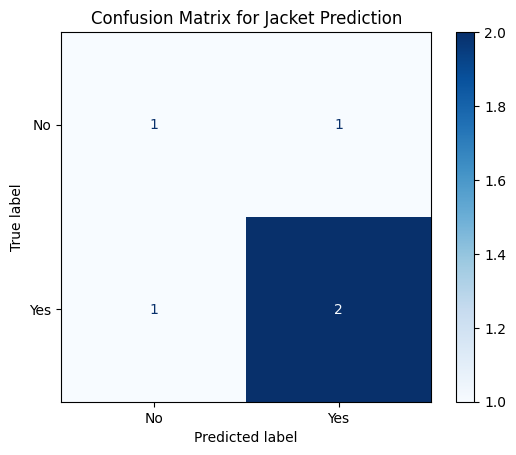

In [13]:
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Jacket Prediction")
plt.show()


In [14]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.50      0.50      0.50         2
         Yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

